<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Projetos de Data Science
</h1>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Este Notebook concentra a descrição do Projeto de Análise de Churn para a empresa Telco.  </i> 
</p>  

# <font color='red' style='font-size: 40px;'> Consultas </font>
<hr style='border: 2px solid red;'>

> CONSULTAR:

https://www.kaggle.com/datasets/datacertlaboratoria/projeto-5

https://www.kaggle.com/code/datacertlaboratoria/guia-de-resolu-o-projeto-5

# <font color='red' style='font-size: 40px;'> Problemática </font>
<hr style='border: 2px solid red;'>

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> TELCO é uma empresa jovem e com muito potencial, cujas filiais estão localizadas em 1.106 cidades do estado da Califórnia, Estados Unidos.  </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> A CEO da empresa queria entender como diminuir a perda de clientes na TELCO, portanto, durante as apresentações, um dos Diretores disse as seguintes hipóteses: 

    1. A perda de clientes na TELCO se deve ao aumento da concorrência. Há cada vez mais concorrentes no mercado, principalmente na região de San Diego, o que nos faz perder mais clientes lá do que em outros lugares.

    2. O problema são os contratos mensais. Se pudéssemos migrar todos os nossos clientes para contratos mais longos, todos os nossos problemas seriam resolvidos.

 </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Após ouvir as declarações do Diretor, a CEO disse: “É claro para mim que os contratos mês a mês são mais propensos à perda do que os outros, mas como sabemos se esse efeito é o mesmo para todas as idades, ou se é o mesmo para os clientes com mais ou menos antiguidade? Além disso, assumindo que a estratégia que você propõe acaba sendo a correta, ou seja, em geral buscamos movimentar os clientes para contratos mais longos, como priorizamos? Quem contatamos primeiro? Gostaria de fazer uma análise profunda da situação para entendê-la melhor.”
 </i> 
</p>  

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> Dado esta problemática, ficou acordado o desenvolvimento de um relatório analítico a fim de detectar os principais motivos de Churn, bem como um modelo para combater a situação.
 </i> 
</p>  


# <font color='red' style='font-size: 40px;'> Bibliotecas Utilizadas </font>
<hr style='border: 2px solid red;'>

In [28]:
## Bibliotecas De Manipulação de Dados e Visualização
import pandas as pd 
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Bibliotecas de Manipulação de Tempo
import time
import datetime


# Bibliotecas de Suporte
import warnings



# Parâmetros de Otimização
%matplotlib inline
sns.set()
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings

# <font color='red' style='font-size: 40px;'> Funções </font>
<hr style='border: 2px solid red;'>

* Plota Barras 

In [29]:
def plota_barras(lista_variaveis, hue, dados, linhas, colunas):
    if hue != False:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()
        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[i], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else: 
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[i, j], hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
    else:
        if (linhas == 1) and (colunas == 1):
            k = 0
            ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', color='#1FB3E5')
            ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
            ax.set_ylabel(f'Quantidade', fontsize = 14)
            total = []
            for bar in ax.patches:
                height = bar.get_height()
                total.append(height)
            total = sum(total)
            
            sizes = []
            for bar in ax.patches:
                height = bar.get_height()
                sizes.append(height)
                ax.text(bar.get_x() + bar.get_width()/1.6,
                        height+200,
                        f'{round((height/total)*100, 2)}%',
                        ha = 'center',
                        fontsize = 12
                )
            ax.set_ylim(0, max(sizes)*1.1)
            plt.show()

        elif linhas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        elif colunas == 1:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[i], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1
        else:
            fig, axis = plt.subplots(linhas, colunas, figsize=(20, 10), sharey=True)
            k = 0
            for i in np.arange(linhas):
                for j in np.arange(colunas):
                    ax = sns.countplot(x = lista_variaveis[k], data = dados, orient = 'h', ax = axis[i, j], color='#1FB3E5')
                    ax.set_xlabel(f'{lista_variaveis[k]}', fontsize = 14)
                    ax.set_ylabel(f'Quantidade', fontsize = 14)
                    total = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        total.append(height)
                    total = sum(total)
                    
                    sizes = []
                    for bar in ax.patches:
                        height = bar.get_height()
                        sizes.append(height)
                        ax.text(bar.get_x() + bar.get_width()/1.6,
                                height+200,
                                f'{round((height/total)*100, 2)}%',
                                ha = 'center',
                                fontsize = 12
                        )
                    ax.set_ylim(0, max(sizes)*1.1)
                    k = k + 1


* Plota Histogramas 

In [30]:
def plota_histograma(variavel, hue, dados, titulo):
    if hue != False:
        mediana1 = dados.loc[dados[hue] == 'Yes'][variavel].median()
        media1 = round(dados.loc[dados[hue] == 'Yes'][variavel].mean(), 2)
        mediana2 = dados.loc[dados[hue] == 'Yes'][variavel].median()
        media2 = round(dados.loc[dados[hue] == 'Yes'][variavel].mean(), 2)
        plt.figure(figsize = (14, 4))
        sns.histplot(data = dados, x = variavel, multiple="dodge", shrink=.8, hue = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'}, bins = 60)
        plt.title(f'Distribuição {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.ylabel('Frequência', fontsize = 14)
        plt.axvline(x = mediana1, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana Churn = {mediana1}')
        plt.axvline(x = media1, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media Churn = {media1}')
        plt.axvline(x = mediana2, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana No Churn = {mediana2}')
        plt.axvline(x = media2, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media No Churn = {media2}')
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()
    else:
        mediana = dados[variavel].median()
        media = round(dados[variavel].mean(), 2)
        plt.figure(figsize = (14, 4))
        sns.histplot(data = dados, x = variavel, multiple="dodge", shrink=.8, color = '#1FB3E5', bins = 60)
        plt.title(f'Distribuição {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.ylabel('Frequência', fontsize = 14)
        plt.axvline(x = mediana, ymax = 0.75 ,color = '#231F20', linestyle = '-', label = f'mediana = {mediana}')
        plt.axvline(x = media, ymax = 0.75,color = '#231F20', linestyle = '--', label = f'media = {media}')
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()

* Plota Boxplot

In [31]:
def plota_boxplot(variavel, hue, dados, titulo):
    if hue != False:
        plt.figure(figsize = (7, 4))
        sns.boxplot(data = dados, x = variavel, orient = 'h', y = hue, palette={'Yes':'#1FB3E5', 'No':'#696969'})
        plt.title(f'Boxplot {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.show()
    else: 
        plt.figure(figsize = (7, 4))
        sns.boxplot(data = dados, x = variavel, orient = 'h', color = '#1FB3E5')
        plt.title(f'Boxplot {titulo}', fontsize = 16)
        plt.xlabel('Intervalo de Valores', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.tight_layout()
        plt.show()

* Plota Ranking

In [32]:
def plota_ranking(x, y, dados, N, titulo):
    if hue != False:
        ranking = dados[[x, y]].drop_duplicates().sort_values(by = x, ascending = False).head(N)
        plt.figure(figsize = (7,4))
        sns.barplot(data = ranking, x = x, y = y, hue = hue, color = '#1FB3E5')
        plt.title(f'Ranking {titulo}', fontsize = 16)
        plt.xlabel(f'{x}', fontsize = 14)
        plt.ylabel(f'{y}', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()
    else:
        ranking = dados[[x, y]].drop_duplicates().sort_values(by = x, ascending = False).head(N)
        plt.figure(figsize = (7,4))
        sns.barplot(data = ranking, x = x, y = y, hue = hue, color = '#1FB3E5')
        plt.title(f'Ranking {titulo}', fontsize = 16)
        plt.xlabel(f'{x}', fontsize = 14)
        plt.ylabel(f'{y}', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()

* Realiza Encoding

In [33]:
def label_encoding(variavel, dados):
    dados[variavel] = dados[variavel].replace({'Yes':1, 'No':0})
    return dados[variavel]

# <font color='red' style='font-size: 40px;'> 1.0 Entendimento das Bases de Dados </font>
<hr style='border: 2px solid red;'>

## 1.1) CUSTOMER CHARACTERISTICS (DEMOGRAPHICS, LOCATIONS AND POPULATIONS) 

* DEMOGRAPHICS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Gender: Sexo do cliente: Masculino, Feminino.

> 4. Age: A idade atual do cliente, em anos, no momento em que o trimestre fiscal terminou.

> 5. Under 30: Indica se o cliente tem menos de 30 anos: Sim, Não.

> 6. Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não. 

> 7. Married: Indica se o cliente é casado: Sim, Não.

> 8. Dependents: Indica se o cliente vive com um dependente: Sim, Não. Os dependentes podem ser filhos, pais, avós, etc.

> 9. Number of Dependents: Indica o número de dependentes que moram com o cliente.

* LOCATIONS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Country: O país de residência principal do cliente.

> 4. State: O estado da residência principal do cliente.

> 5. City: A principal cidade de residência do cliente.

> 6. Zip Code: O código postal da residência principal do cliente.

> 7. Latitude: A latitude da residência principal do cliente.

> 8. Longitude: A longitude da residência principal do cliente.

* POPULATIONS

> 1. ID: Um ID exclusivo que identifica cada linha.

> 2. Zip Code: O código postal da residência principal do cliente.

> 3. Population: Uma estimativa da população atual para toda a área do código postal.

In [34]:
# Leitura de Arquivos
demographics_raw = pd.read_csv('./data/DEMOGRAPHICS.csv')
locations_raw = pd.read_csv('./data/LOCATION.csv')
populations_raw = pd.read_csv('./data/POPULATION.csv')

# Junção dos Dataframes para formar um DataFrame de Características dos Clientes
locations_raw = locations_raw.merge(populations_raw.drop('ID', axis = 1), on = 'Zip Code', how = 'inner')
customer_charact_raw = demographics_raw.merge(locations_raw.drop('Count', axis = 1), on = 'Customer ID', how = 'inner')

# Padronização de Variáveis
customer_charact_trusted = customer_charact_raw.copy()
customer_charact_trusted['Gender'].replace({'Male':'M', 'Female':'F'}, inplace = True)
customer_charact_trusted['Under 30'] = np.where(customer_charact_trusted['Age'] < 30, 'Yes', 'No' )
customer_charact_trusted['Adult'] = np.where(customer_charact_trusted['Age'].between(30, 65, inclusive = 'left') , 'Yes', 'No' )
customer_charact_trusted['Senior Citizen'] = np.where(customer_charact_trusted['Age'] >= 65, 'Yes', 'No' )

# Criação de Variáveis 
customer_charact_trusted.loc[(customer_charact_trusted['Under 30'] == 'Yes'), 'Age Label'] = 'Under 30'
customer_charact_trusted.loc[(customer_charact_trusted['Adult'] == 'Yes'), 'Age Label'] = 'Adult'
customer_charact_trusted.loc[(customer_charact_trusted['Senior Citizen'] == 'Yes'), 'Age Label'] = 'Senior Citizen'

customer_charact_trusted = customer_charact_trusted[['Customer ID', 'Gender', 'Age', 'Under 30', 'Adult','Senior Citizen', 'Age Label','Married', 'Dependents', 'Number of Dependents', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Population']]
customer_charact_trusted.head(3)

,Customer ID,Gender,Age,Under 30,Adult,Senior Citizen,Age Label,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population
0,8779-QRDMV,M,78,No,No,Yes,Senior Citizen,No,No,0,United States,California,Los Angeles,90022,34.02,-118.16,68701
1,7495-OOKFY,F,74,No,No,Yes,Senior Citizen,Yes,Yes,1,United States,California,Los Angeles,90063,34.04,-118.19,55668
2,1658-BYGOY,M,71,No,No,Yes,Senior Citizen,No,Yes,3,United States,California,Los Angeles,90065,34.11,-118.23,47534


## 1.2) SERVICES

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Quarter: O trimestre fiscal do qual os dados foram derivados (por exemplo, Q3).

> 4. Referred a Friend: Indica se o cliente já encaminhou um amigo ou familiar para esta empresa: Sim, Não

> 6. Tenure in Months: Indica o número total de meses em que o cliente está na empresa no final do trimestre especificado anteriormente.

> 7. Phone Service: Indica se o cliente contrata o serviço de telefonia residencial com a empresa: Sim, Não

> 8. Multiple Lines: Indica se o cliente contrata várias linhas telefônicas com a empresa: Sim, Não

> 9. Internet Service: Indica se o cliente contrata o serviço de Internet com a empresa: Não, Sim

> 10. Internet Type: O tipo de internet que o cliente usa DSL, Fibra Óptica, Cabo.

> 11. Online Security: Indica se o cliente assina um serviço de segurança online adicional fornecido pela empresa: Sim, Não

> 12. Online Backup: Indica se o cliente assina um serviço de backup online adicional fornecido pela empresa: Sim, Não

> 13. Device protection Plan: Indica se o cliente assina um plano de proteção de dispositivo adicional para o equipamento de Internet fornecido 

> 14. Premium Tech Support: Indica se o cliente assina um plano de suporte técnico adicional da empresa com tempos de espera reduzidos

> 15. Streaming TV: Indica se o cliente usa seu serviço de Internet para transmitir programação de televisão de um provedor terceirizado

> 16. Streaming Movies: Indica se o cliente usa seu serviço de Internet para transmitir filmes de um provedor externo: Sim, Não. 

> 17. Streaming Music: Indica se o cliente usa seu serviço de Internet para transmitir música de um provedor externo: Sim, Não. A empresa não

> 18. Contract: Indica o tipo de contrato atual do cliente: mês a mês, um ano, dois anos.

> 19. Paperless Billing: Indica se o cliente optou pelo faturamento sem papel: Sim, Não

> 20. Payment Method: Indica como o cliente paga sua fatura: Saque bancário, cartão de crédito, cheque enviado

> 21. Monthly Charge: Indica a cobrança mensal total atual do cliente para todos os serviços da empresa.

> 22. Total Charges: Indica os encargos totais do cliente, calculados no final do trimestre especificado anteriormente.



In [35]:
services_raw = pd.read_csv('./data/SERVICES.csv')
services_trusted = services_raw.copy()
services_trusted.head(3)

,Customer ID,Count,Quarter,Referred a Friend,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges
0,8779-QRDMV,1,Q3,No,1,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65
1,7495-OOKFY,1,Q3,Yes,8,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30
2,1658-BYGOY,1,Q3,No,18,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55


## 1.3) STATUS

> 1. Customer ID: Um ID exclusivo que identifica cada cliente.

> 2. Count: Um valor usado em relatórios para resumir o número de clientes em um conjunto filtrado.

> 3. Quarter: O trimestre fiscal do qual os dados foram derivados (por exemplo, Q3).

> 4. Customer Status: Indica o status do cliente no final do trimestre: Churned, Stayed ou Joined

> 5. Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado

> 6. Churn Value: 1 = o cliente deixou a empresa neste trimestre. 0 = o cliente permaneceu na empresa. Diretamente relacionado ao Churn

> 7. Churn Category: Uma categoria de alto nível para o motivo da rotatividade de clientes: Atitude, Concorrente, Insatisfação, Outros,

> 8. Churn Reason: Motivo específico de um cliente para deixar a empresa. Diretamente relacionado à categoria Churn.

In [36]:
status_raw = pd.read_csv('./data/STATUS.csv')
status_trusted = status_raw.copy()
status_trusted['Churn Category'].replace({'':'Uninformed'}, inplace = True)
status_trusted['Churn Reason'].replace({'':'Uninformed'}, inplace = True)
status_trusted.head(3)

,Customer ID,Count,Quarter,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,Churned,Yes,1,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,Churned,Yes,1,Competitor,Competitor made better offer


# <font color='red' style='font-size: 40px;'> 2.0 Análise Exploratória - Foco em Análises Bivariadas </font>
<hr style='border: 2px solid red;'>

## 2.1) Junção de Dataframes 

In [37]:
customer_charact_refined = customer_charact_trusted.copy()
customer_charact_refined = customer_charact_refined.merge(services_trusted.drop(['Count', 'Quarter'], axis = 1), on = 'Customer ID', how = 'inner')
customer_charact_refined = customer_charact_refined.merge(status_trusted.drop(['Count', 'Quarter'], axis = 1), on = 'Customer ID', how = 'inner')

telco_churn = customer_charact_refined.copy()
print(telco_churn.shape)
telco_churn.head(5)

(7043, 40)


,Customer ID,Gender,Age,Under 30,Adult,Senior Citizen,Age Label,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Referred a Friend,Tenure in Months,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Customer Status,Churn Label,Churn Value,Churn Category,Churn Reason
0,8779-QRDMV,M,78,No,No,Yes,Senior Citizen,No,No,0,United States,California,Los Angeles,90022,34.02,-118.16,68701,No,1,No,No,Yes,DSL,No,No,Yes,No,No,Yes,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,Churned,Yes,1,Competitor,Competitor offered more data
1,7495-OOKFY,F,74,No,No,Yes,Senior Citizen,Yes,Yes,1,United States,California,Los Angeles,90063,34.04,-118.19,55668,Yes,8,Yes,Yes,Yes,Fiber Optic,No,Yes,No,No,No,No,No,Month-to-Month,Yes,Credit Card,80.65,633.30,Churned,Yes,1,Competitor,Competitor made better offer
2,1658-BYGOY,M,71,No,No,Yes,Senior Citizen,No,Yes,3,United States,California,Los Angeles,90065,34.11,-118.23,47534,No,18,Yes,Yes,Yes,Fiber Optic,No,No,No,No,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,Churned,Yes,1,Competitor,Competitor made better offer
3,4598-XLKNJ,F,78,No,No,Yes,Senior Citizen,Yes,Yes,1,United States,California,Inglewood,90303,33.94,-118.33,27778,Yes,25,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,Yes,Yes,No,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,Churned,Yes,1,Dissatisfaction,Limited range of services
4,4846-WHAFZ,F,80,No,No,Yes,Senior Citizen,Yes,Yes,1,United States,California,Whittier,90602,33.97,-118.02,26265,Yes,37,Yes,Yes,Yes,Fiber Optic,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,Churned,Yes,1,Price,Extra data charges


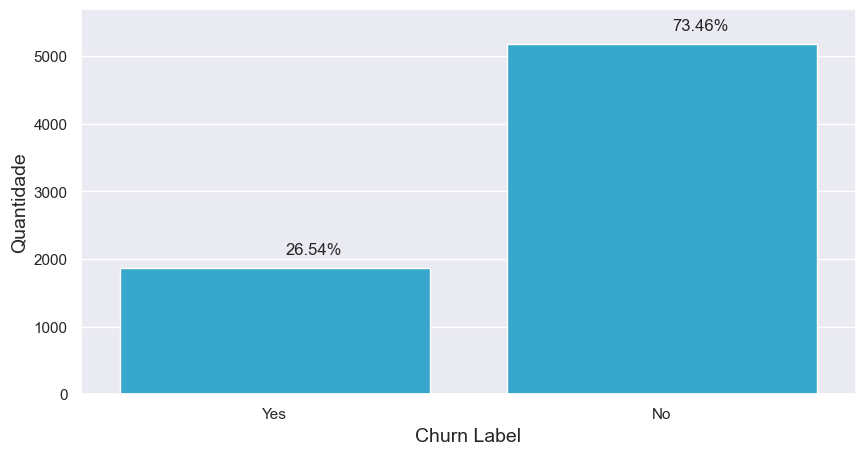

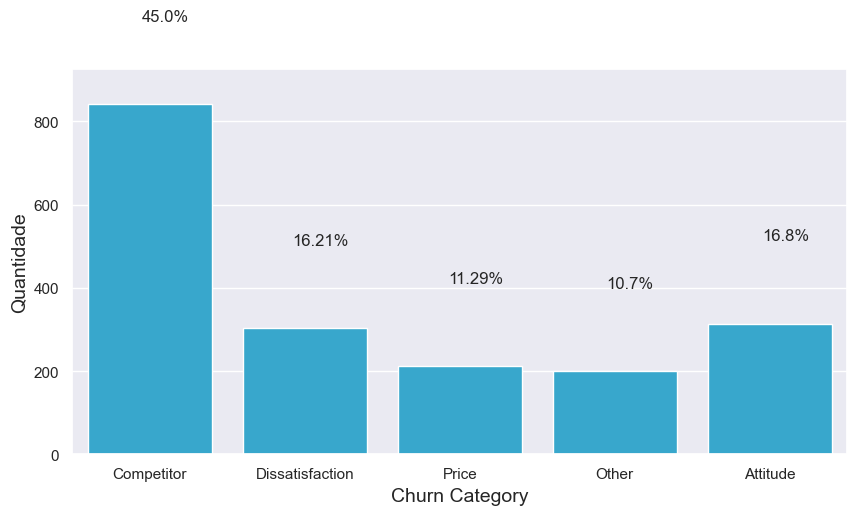

In [38]:
plota_barras(['Churn Label'], False, telco_churn, 1, 1)
plota_barras(['Churn Category'], False, telco_churn, 1, 1)

#### 1. Em torno de 26.54% dos clientes possuem Cancelamento, sendo:

- 45% Para a Concorrência

- 16.8% por Vontade Própria

- 16.21% por Insatisfação em Geral

- 11.29% por Insatisfação com os Preços 

- 10.7% por Outros Motivos

## 2.1) Hipótese I - Será que o Churn é influenciado pelas características dos clientes (Gênero, Relacionamento, Número de Dependentes e Idade, Tempo de Casa, Indicações, Cidade)?

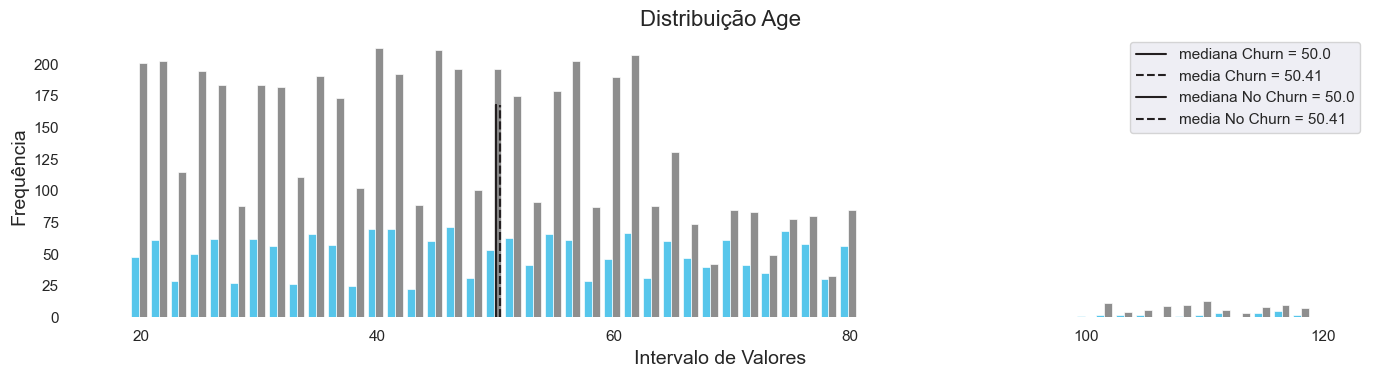

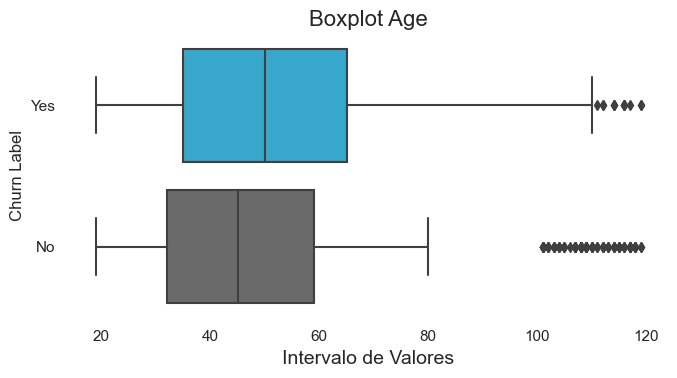

In [39]:
plota_histograma('Age', 'Churn Label', telco_churn, 'Age')
plota_boxplot('Age', 'Churn Label', telco_churn, 'Age')

#### 1. Logo de cara, nota-se a presença de alguns Outliers Superiores com idades avançadas entre 100 a 120 anos.

#### 2. Por conta da idade avançada, a probabilidade de terceiros tomando as decisões de cancelarem ou não os serviços no nome dos proprietários é alta, portanto, eles podem passar um viés errado sobre o Cancelamento. Dado isso, decidiu-se retirá-los da amostra.

In [40]:
qt_outliers = telco_churn.loc[telco_churn.Age > 100]['Customer ID'].unique().shape[0]
qt_total = telco_churn['Customer ID'].unique().shape[0]

telco_churn_outliers = telco_churn.loc[telco_churn.Age > 100]['Customer ID'].unique()

print(f'Remoção de {round((qt_outliers/qt_total)*100, 2)}% do Dataset')
telco_churn = telco_churn.loc[~telco_churn['Customer ID'].isin(telco_churn_outliers)]

qt_total = telco_churn['Customer ID'].unique().shape[0]
print(f'Agora, o Dataset tem {qt_total} registros')

Remoção de 1.55% do Dataset
Agora, o Dataset tem 6934 registros


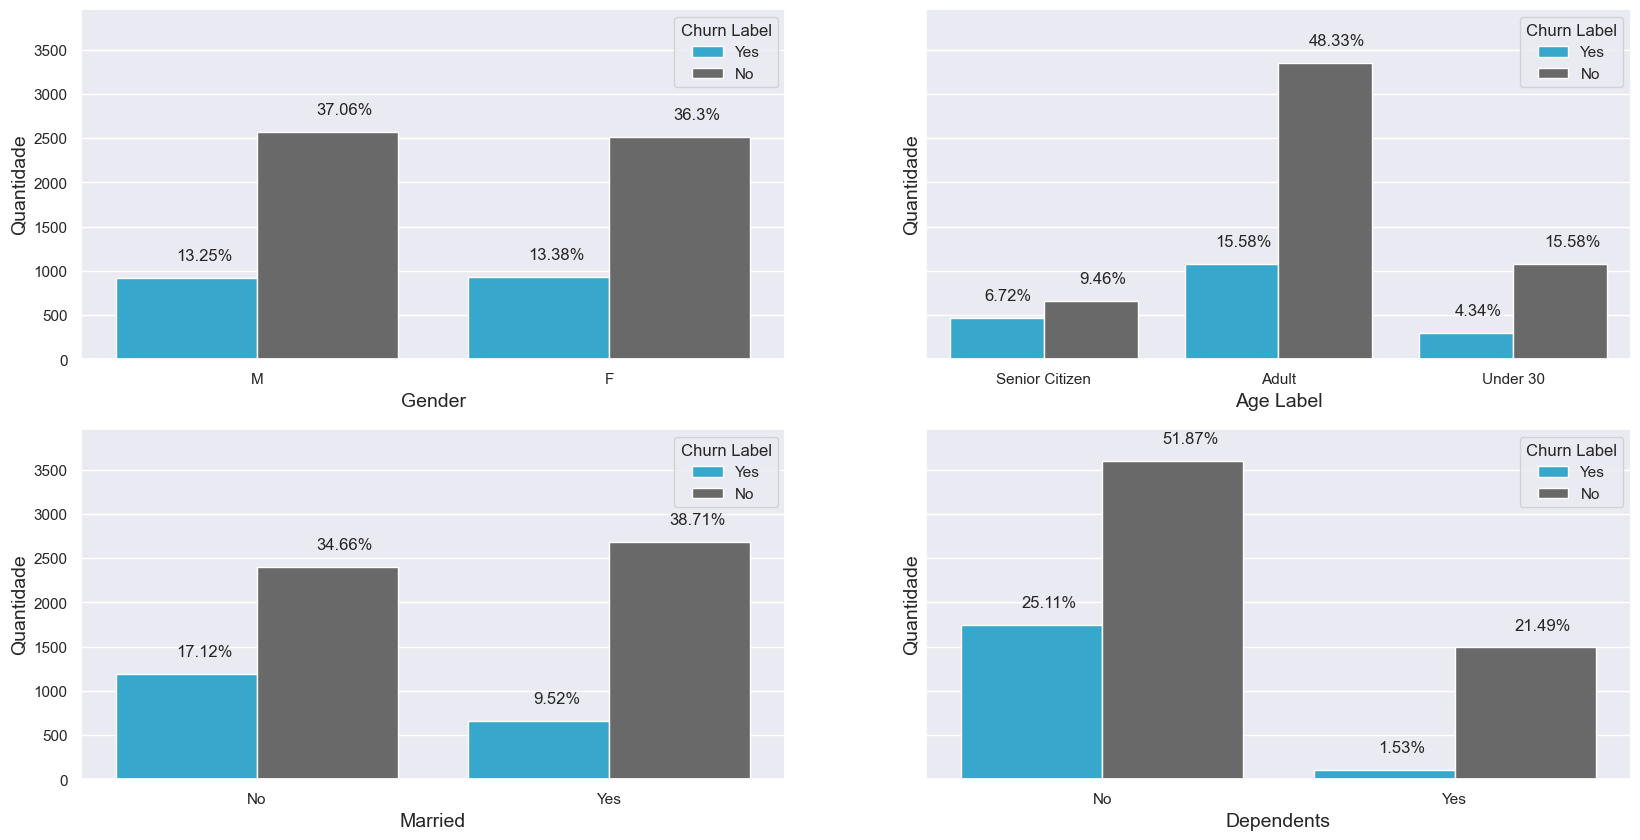

In [41]:
plota_barras(['Gender', 'Age Label', 'Married', 'Dependents'], 'Churn Label', telco_churn, 2, 2)

#### 1. Gênero: aparentemente, o Gênero não é um fator importante para Cancelamento, dado o comportamento do gráfico.

#### 2. Idade: pessoas idosas (65 anos ou mais) possuem elevado índice de Cancelamento em comparação com pessoas mais jovens, pois há em torno de 1/3 de Cancelamento para Adultos e Jovens com menos de 30 anos.

#### 3. Casamento e Número de Depentes: Pessoas solteiras ou sem dependentes também tendem a ter mais Cancelamentos, visto que é uma ação que dependete única e exclusivamente dela como a própria categoria sugere.

In [53]:
telco_churn[['City', 'Population', 'Churn Label']].head()

,City,Population,Churn Label
0,Los Angeles,68701,Yes
1,Los Angeles,55668,Yes
2,Los Angeles,47534,Yes
3,Inglewood,27778,Yes
4,Whittier,26265,Yes


In [ ]:
def plota_ranking(x, y, dados, N, titulo):
    if hue != False:
        ranking = dados[[x, y]].drop_duplicates().sort_values(by = x, ascending = False).head(N)
        plt.figure(figsize = (7,4))
        sns.barplot(data = ranking, x = x, y = y, hue = hue, color = '#1FB3E5')
        plt.title(f'Ranking {titulo}', fontsize = 16)
        plt.xlabel(f'{x}', fontsize = 14)
        plt.ylabel(f'{y}', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()
    else:
        ranking = dados[[x, y]].drop_duplicates().sort_values(by = x, ascending = False).head(N)
        plt.figure(figsize = (7,4))
        sns.barplot(data = ranking, x = x, y = y, hue = hue, color = '#1FB3E5')
        plt.title(f'Ranking {titulo}', fontsize = 16)
        plt.xlabel(f'{x}', fontsize = 14)
        plt.ylabel(f'{y}', fontsize = 14)
        plt.grid(False)
        plt.box(False)
        plt.legend(loc = 'best')
        plt.tight_layout()
        plt.show()

## 2.2) Hipótese II - Será que o Churn é influenciado pelo Contrato, Meio de Pagamento, Tempo de Casa ou Serviços? 

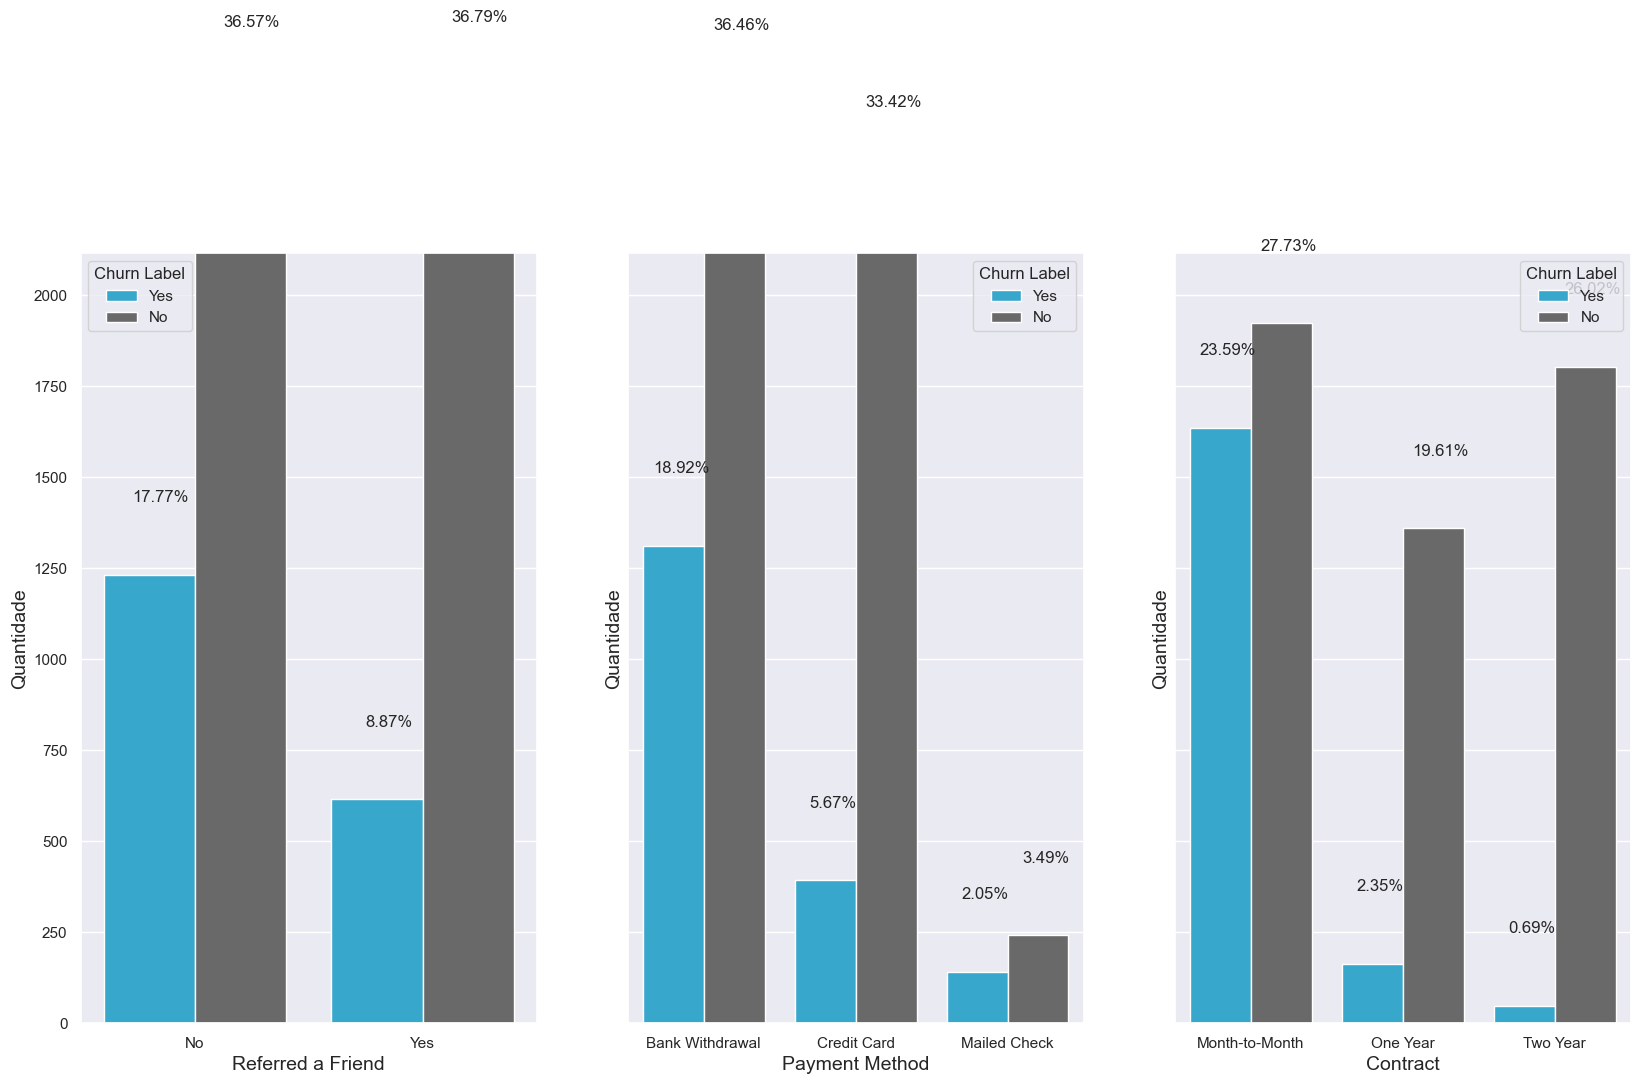

In [42]:
plota_barras(['Referred a Friend', 'Payment Method', 'Contract'], 'Churn Label', telco_churn, 1, 3)

#### 1. Pessoas que nunca recomendaram a empresa para um amigo ou familiar aparentam ter mais chance de aderirem ao Cancelamento. Faz sentido, dado que a falta de recomendações pode significar insatisfação com os serviços.

#### 2. Pessoas as quais costumam pagar com saques bancários tem maior propensão ao Cancelamento. Pela natural evolução tecnológica nos meios de pagamento, talvez haja um movimento interno da empresa para incentivar novos meios de pagamentos e, dado essa situação, causou um descontentamento nos clientes.

#### 3. Definitivamente contratos mais longos tendem a ter taxas de Cancelamento muito menores, todavia, este não é o único motivo. 



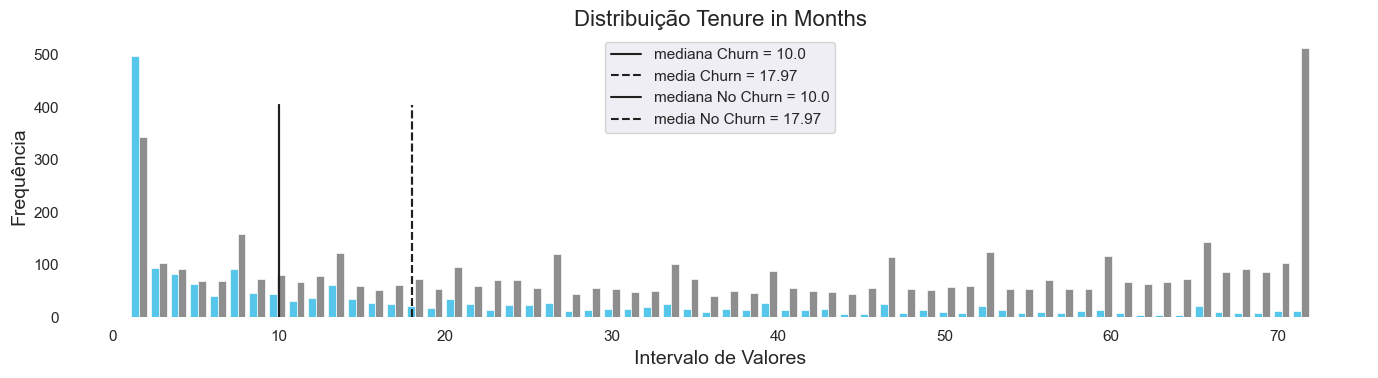

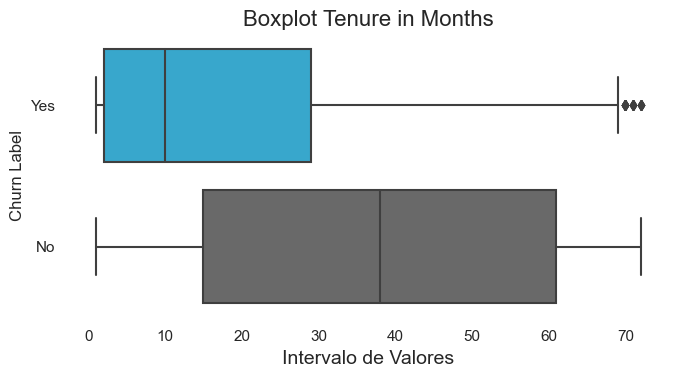

In [43]:
plota_histograma('Tenure in Months', 'Churn Label', telco_churn, 'Tenure in Months')
plota_boxplot('Tenure in Months', 'Churn Label', telco_churn, 'Tenure in Months')

#### 1. O tempo de "casa" denifitvamente é um fator importante, dado que há maior permanência em clientes mais antigos.

### 2) Serviços e Streaming

Phone Service -> Se o cliente contrata o serviço de telefonia

Internet Service -> Indica se o cliente contrata o serviço de Internet 

Online Security -> Indica se o cliente assina um serviço de segurança online 

Online Backup -> Indica se o cliente assina um serviço de backup 

Device Protection Plan -> Indica se o cliente assina um plano de proteção do dispositivo

Premium Tech Support -> Indica se o cliente assina um plano de suporte técnico adicional

Unlimited Data -> Indica se o cliente pagou uma taxa mensal adicional para ter downloads/uploads de dados ilimitados

Streaming TV -> Indica se o cliente utiliza sua Internet para utilizar TV de Provedores Externos

Streaming Movies -> Indica se o cliente  utiliza sua Internet para utilizar Filmes de Provedores Externos

Streaming Music -> Indica se o cliente utiliza sua Internet para utilizar Músicas de Provedores Externos

# <font color='red' style='font-size: 40px;'> 3.0 Pré-Processamento </font>
<hr style='border: 2px solid red;'>

In [44]:
# demographics_raw = demographics_raw.merge(locations_raw.drop('Count', axis = 1), on = 'Customer ID', how = 'inner')
# demographics_raw = demographics_raw.merge(populations_raw.drop('ID', axis = 1), on = 'Zip Code', how = 'inner')
# demographics_raw = demographics_raw.merge(services_raw.drop(['Count', 'Quarter'], axis = 1), on = 'Customer ID', how = 'inner')
# demographics_raw = demographics_raw.merge(status_raw.drop(['Count', 'Quarter'], axis = 1), on = 'Customer ID', how = 'inner')

# df_churn_raw = demographics_raw.copy()
# print(df_churn_raw.columns)
# df_churn_raw.head(3)

# <font color='red' style='font-size: 40px;'> 4.0 Modelagem I </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 5.0 Modelagem II </font>
<hr style='border: 2px solid red;'>

# <font color='red' style='font-size: 40px;'> 6.0 Consolidação dos Resultados </font>
<hr style='border: 2px solid red;'>